In [2]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=5c8461a62da189aefe1b57c195a0d2a6b6da1af829be2f604b316787492fd3ab
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [4]:
from sklearn.cluster import \
(KMeans,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,
cut_tree)
from ISLP.cluster import compute_linkage

# 12.6 Applied Exercises

## Question 7. In this chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the $i_{th}$ and $j_{th}$ observations, then the quantity $1 − r_{ij}$ is proportional to the squared Euclidean distance between the $i_{th}$ and $j_{th}$ observations.

## On the USArrests data, show that this proportionality holds.

In [4]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [5]:
usS = StandardScaler().fit_transform(USArrests)
usS

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [6]:
usS = pd.DataFrame(usS, columns= USArrests.columns)

In [7]:
usS

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [8]:
usS.mean()

,0
Murder,-7.105427e-17
Assault,1.387779e-16
UrbanPop,-4.396483e-16
Rape,8.593126e-16


In [9]:
usS.std()

,0
Murder,1.010153
Assault,1.010153
UrbanPop,1.010153
Rape,1.010153


In [21]:
corr_dist = np.corrcoef(usS, rowvar = False)
corr_dist

array([[1.        , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.        , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.        , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.        ]])

In [18]:
from sklearn.metrics import pairwise_distances
pairwise = pairwise_distances(usS.T)
pairwise

array([[0.00000000e+00, 4.45114242e+00, 9.64586636e+00, 6.60621803e+00],
       [4.45114242e+00, 0.00000000e+00, 8.60888087e+00, 5.78583417e+00],
       [9.64586636e+00, 8.60888087e+00, 0.00000000e+00, 7.67241008e+00],
       [6.60621803e+00, 5.78583417e+00, 7.67241008e+00, 1.68587394e-07]])

In [22]:
new_dist = 1 - corr_dist
new_dist

array([[2.22044605e-16, 1.98126688e-01, 9.30427378e-01, 4.36421167e-01],
       [1.98126688e-01, 0.00000000e+00, 7.41128298e-01, 3.34758770e-01],
       [9.30427378e-01, 7.41128298e-01, 2.22044605e-16, 5.88658764e-01],
       [4.36421167e-01, 3.34758770e-01, 5.88658764e-01, 0.00000000e+00]])

In [23]:
portion_dist = pairwise / new_dist
portion_dist

<ipython-input-23-8a680349f942>:1: RuntimeWarning: divide by zero encountered in divide
  portion_dist = pairwise / new_dist
<ipython-input-23-8a680349f942>:1: RuntimeWarning: invalid value encountered in divide
  portion_dist = pairwise / new_dist


array([[ 0.        , 22.46614253, 10.36713513, 15.13725395],
       [22.46614253,         nan, 11.6159117 , 17.28359249],
       [10.36713513, 11.6159117 ,  0.        , 13.03371417],
       [15.13725395, 17.28359249, 13.03371417,         inf]])

In [25]:
from scipy.spatial.distance import pdist, squareform
euclidean_distances_squared = pdist(usS.T, metric='sqeuclidean')
euclidean_distances_squared = squareform(euclidean_distances_squared)
euclidean_distances_squared

array([[ 0.        , 19.81266883, 93.04273783, 43.6421167 ],
       [19.81266883,  0.        , 74.1128298 , 33.47587703],
       [93.04273783, 74.1128298 ,  0.        , 58.86587644],
       [43.6421167 , 33.47587703, 58.86587644,  0.        ]])

In [26]:
portion_dist_euc = pairwise / euclidean_distances_squared
portion_dist_euc

<ipython-input-26-64236da407b4>:1: RuntimeWarning: divide by zero encountered in divide
  portion_dist_euc = pairwise / euclidean_distances_squared
<ipython-input-26-64236da407b4>:1: RuntimeWarning: invalid value encountered in divide
  portion_dist_euc = pairwise / euclidean_distances_squared


array([[       nan, 0.22466143, 0.10367135, 0.15137254],
       [0.22466143,        nan, 0.11615912, 0.17283592],
       [0.10367135, 0.11615912,        nan, 0.13033714],
       [0.15137254, 0.17283592, 0.13033714,        inf]])

In [27]:
# Same ratio either way. IT seems if you know one portion then you could discover the other pairwise like
#{12,3} to {2,1}

## Question - 8. In Section 12.2.3, a formula for calculating PVE was given in Equation 12.10. We also saw that the PVE can be obtained using the explained_variance_ratio_ attribute of a fitted PCA() estimator.

## On the USArrests data, calculate PVE in two ways:

### (a) Using the explained_variance_ratio_ output of the fitted PCA() estimator, as was done in Section 12.2.3.


In [28]:
pca = PCA()
pca.fit(usS)

PCA()

In [29]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### (b) By applying Equation 12.10 directly. The loadings are stored as the components_ attribute of the fitted PCA() estimator. Use those loadings in Equation 12.10 to obtain the PVE.

In [30]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [31]:
usS.columns, usS.index

(Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object'),
 RangeIndex(start=0, stop=50, step=1))

In [42]:
ret = []
for m in range(4):
  ans = tot = 0
  for i in range(50):
    for j in range(4):
      ans += (pca.components_[j][m] * usS.iloc[i][j])
    tot += (ans**2)
    ans = 0
  ans2 = tot2 = 0
  for j in range(4):
    for i in range(50):
      ans2 += (usS.iloc[i][j]**2)
    tot2 += ans2
    ans2 = 0
  ret.append(tot/tot2)
ret




<ipython-input-42-97d3b1a4eea0>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans += (pca.components_[j][m] * usS.iloc[i][j])
<ipython-input-42-97d3b1a4eea0>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans2 += (usS.iloc[i][j]**2)


[0.4578010287698383,
 0.15433781419585477,
 0.15291688938502657,
 0.23494426764928114]

In [52]:

components = pca.components_

cov_matrix = np.cov(usS.T)

eigenvalues, _ = np.linalg.eigh(cov_matrix)

eigenvalues = np.flip(eigenvalues)


total_variance = np.sum(eigenvalues)
pve_from_eigenvalues = eigenvalues / total_variance

print("Manual PVE Calculation using eigenvalues:")
print(pve_from_eigenvalues)

print("\nPVE using PCA's explained_variance_ratio_:")
print(pca.explained_variance_ratio_)



Manual PVE Calculation using eigenvalues:
[0.62006039 0.24744129 0.0891408  0.04335752]

PVE using PCA's explained_variance_ratio_:
[0.62006039 0.24744129 0.0891408  0.04335752]


In [53]:
# Guess the formula in the book is a tad off but using eigen values seems to work well

## Question - 9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [55]:
HClust = AgglomerativeClustering
h_comp = HClust(distance_threshold = 0, n_clusters = None, linkage = 'complete', metric = 'euclidean')
h_comp.fit(usS)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

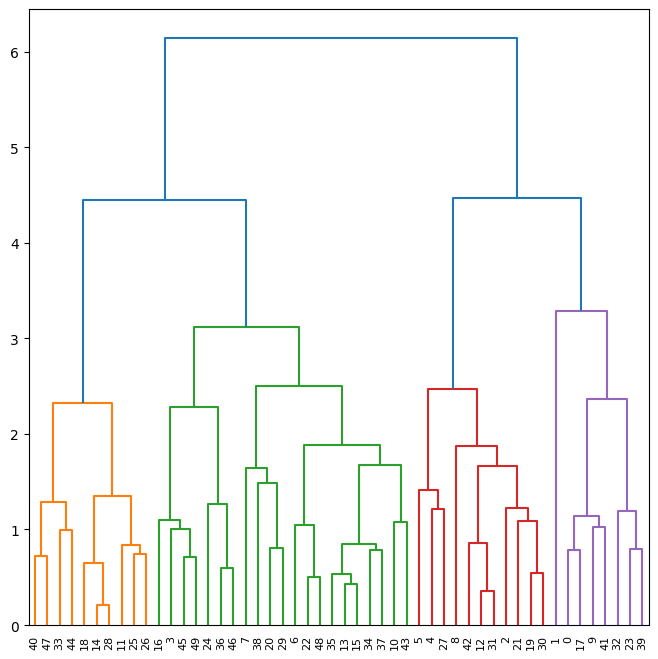

In [57]:
linkage = compute_linkage(h_comp)
fig, ax = plt.subplots(figsize = (8,8))
dendrogram(linkage, ax = ax);


In [60]:
cut_tree(linkage, n_clusters = 3).T

array([[0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
        2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 2]])

### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [61]:
# I did this above, so I will do the nonscaled version here.

In [62]:
HClust_ = AgglomerativeClustering
h_comp_ = HClust_(distance_threshold = 0, n_clusters = None, linkage = 'complete', metric = 'euclidean')
h_comp_.fit(USArrests)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        metric='euclidean', n_clusters=None)

In [65]:
linkage_ = compute_linkage(h_comp_)
cut_tree(linkage_, n_clusters = 3 ).T

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 1, 1, 2, 2, 1]])

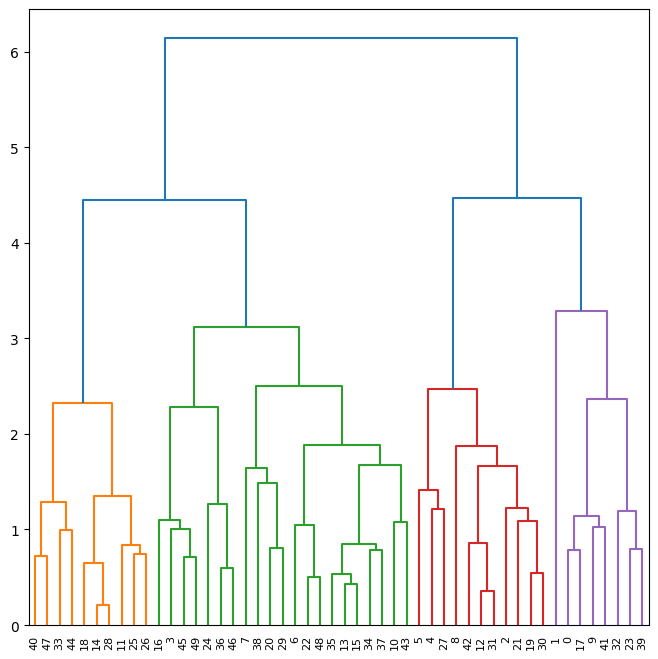

In [67]:
fig, ax = plt.subplots(figsize = (8,8))
dendrogram(linkage, ax = ax);

### (d) What efect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justifcation for your answer.


### Results (d) - The results majorly don't look any different from the dendrogram since the large groups merge point aren't as effected. However when examining the cut at n_clusters = 3. There is a significant difference.

### I believe the variables should be scaled if their units are different or the context is different. The difference is also diffcult to compute to a scale. So I believe it is best to scale everything to mean = 0 and STD = 1.

### Just like the computer and socks example, given in the book.

## Question - 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [5]:
n_class = 3
n_obser = 20
n_var = 50

n_obser_tot = n_class * n_obser

np.random.seed(1)

data = np.random.randn(n_obser_tot, n_var)

data

array([[ 1.62434536, -0.61175641, -0.52817175, ...,  2.10025514,
         0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985, -1.1425182 , ...,  0.04359686,
        -0.62000084,  0.69803203],
       [-0.44712856,  1.2245077 ,  0.40349164, ...,  0.61838026,
         0.23249456,  0.68255141],
       ...,
       [-1.63348696,  0.18335976, -0.6688955 , ...,  0.25004269,
         0.35311566, -0.50097687],
       [-0.20980438,  0.51611688, -0.65932645, ...,  0.86834038,
         0.05403696, -0.8134718 ],
       [-0.16150411, -1.85049913,  0.27497257, ..., -0.15065961,
        -1.40002289, -1.30106608]])

In [6]:
data.shape

(60, 50)

In [7]:
mean_shifts = np.array([
    [5, 0, 0, 0, 0] + [0] * (n_var - 5),  # Mean shift for class 0
    [0, 5, 0, 0, 0] + [0] * (n_var - 5),  # Mean shift for class 1
    [0, 0, 5, 0, 0] + [0] * (n_var - 5)   # Mean shift for class 2
])

shifted_data = np.zeros_like(data)
for class_idx in range(n_class):
    class_indices = np.arange(class_idx * n_obser, (class_idx + 1) * n_obser)
    shifted_data[class_indices] = data[class_indices] + mean_shifts[class_idx]

In [8]:
class_indices

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59])

In [9]:
class_labels = np.repeat(np.arange(n_class), n_obser)
class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = pd.DataFrame(shifted_data, columns=[f'X{i+1}' for i in range(n_var)])
df['Class'] = class_labels
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,Class
0,6.624345,-0.611756,-0.528172,-1.072969,0.865408,-2.301539,1.744812,-0.761207,0.319039,-0.249370,...,-0.887629,-0.747158,1.692455,0.050808,-0.636996,0.190915,2.100255,0.120159,0.617203,0
1,5.300170,-0.352250,-1.142518,-0.349343,-0.208894,0.586623,0.838983,0.931102,0.285587,0.885141,...,0.185156,-0.375285,-0.638730,0.423494,0.077340,-0.343854,0.043597,-0.620001,0.698032,0
2,4.552871,1.224508,0.403492,0.593579,-1.094912,0.169382,0.740556,-0.953701,-0.266219,0.032615,...,-0.101746,0.868886,0.750412,0.529465,0.137701,0.077821,0.618380,0.232495,0.682551,0
3,4.689883,-2.434838,1.038825,2.186980,0.441364,-0.100155,-0.136445,-0.119054,0.017409,-1.122019,...,0.369493,1.904659,1.111057,0.659050,-1.627438,0.602319,0.420282,0.810952,1.044442,0
4,4.599122,0.824006,-0.562305,1.954878,-1.331952,-1.760689,-1.650721,-0.890556,-1.119115,1.956079,...,-0.310985,-0.001891,-1.396620,-0.861316,0.674712,0.618539,-0.443172,1.810535,-1.305727,0
5,4.655013,-0.230840,-2.793085,1.937529,0.366332,-1.044589,2.051173,0.585662,0.429526,-0.606998,...,-0.056824,0.492337,-0.680678,-0.084508,-0.297362,0.417302,0.784771,-0.955425,0.585910,0
6,7.065783,-1.471157,-0.830172,-0.880578,-0.279098,1.622849,0.013353,-0.694694,0.621804,-0.599805,...,1.278528,-0.442229,0.323527,-0.109991,0.008549,-0.168199,-0.174180,0.461164,-1.175983,0
7,6.010127,0.920018,-0.195057,0.805393,-0.701344,-0.537223,0.156264,-0.190221,-0.448738,-0.672448,...,1.767960,-0.475373,0.477610,-1.021886,0.794528,-1.873161,0.920615,-0.035368,2.110605,0
8,3.693466,0.076380,0.367232,1.232899,-0.422857,0.086464,-2.142467,-0.830169,0.451616,1.104174,...,-1.684060,-1.160170,1.350107,-0.331283,0.386539,-0.851456,1.000881,-0.384832,1.458108,0
9,4.467766,1.118133,0.674396,-0.722392,1.098996,-0.901634,-0.822467,0.721711,-0.625342,-0.593843,...,0.630196,-0.414847,0.451946,-1.579156,-0.828628,0.528880,-2.237087,-1.107713,-0.017718,0


In [13]:
# np.arange()
# np.random.randn()
# np.random.seed()
# np.repeat
# np.zeros_like()

In [15]:

def generate_centered_array(n_rows, n_cols, mean_value, std_dev=1):
    data = np.random.normal(loc=0, scale=std_dev, size=(n_rows, n_cols))
    current_mean = np.mean(data)
    data += (mean_value - current_mean)
    return data

np.random.seed(1)
n_rows = 20
n_cols = 50
mean_values = [10, 20, 30]

array1 = generate_centered_array(n_rows, n_cols, mean_values[0])
array2 = generate_centered_array(n_rows, n_cols, mean_values[1])
array3 = generate_centered_array(n_rows, n_cols, mean_values[2])

new_array = np.vstack([array1, array2, array3])

df_ = pd.DataFrame(new_array, columns=[f'X{i+1}' for i in range(n_cols)])

df_['Class'] = [0] * n_rows + [1] * n_rows + [2] * n_rows

df_



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,Class
0,11.585533,9.349431,9.433016,8.888219,10.826595,7.659649,11.705999,9.199981,10.280227,9.711817,...,9.073559,9.214029,11.653642,10.011995,9.324192,10.152103,12.061443,10.081346,10.578391,0
1,10.261358,9.608938,8.818669,9.611845,9.752293,10.547811,10.800171,10.892290,10.246775,10.846329,...,10.146344,9.585903,9.322457,10.384682,10.038528,9.617334,10.004784,9.341187,10.659220,0
2,9.514059,11.185695,10.364679,10.554766,8.866276,10.130570,10.701744,9.007487,9.694969,9.993802,...,9.859442,10.830074,10.711599,10.490653,10.098889,10.039009,10.579568,10.193682,10.643739,0
3,9.651071,7.526350,11.000012,12.148167,10.402552,9.861032,9.824743,9.842133,9.978597,8.839169,...,10.330680,11.865846,11.072244,10.620237,8.333749,10.563507,10.381470,10.772139,11.005630,0
4,9.560309,10.785193,9.398882,11.916066,8.629236,8.200499,8.310466,9.070632,8.842072,11.917266,...,9.650203,9.959296,8.564567,9.099871,10.635899,10.579727,9.518016,11.771722,8.655461,0
5,9.616200,9.730348,7.168103,11.898716,10.327520,8.916598,12.012361,10.546850,10.390714,9.354189,...,9.904363,10.453524,9.280509,9.876679,9.663826,10.378490,10.745958,9.005762,10.547098,0
6,12.026971,8.490031,9.131016,9.080610,9.682090,11.584037,9.974540,9.266494,10.582991,9.361383,...,11.239716,9.518958,10.284715,9.851196,9.969736,9.792989,9.787007,10.422352,8.785205,0
7,10.971315,10.881205,9.766130,10.766581,9.259843,9.423964,10.117451,9.770966,9.512449,9.288739,...,11.729147,9.485815,10.438798,8.939302,10.755716,8.088027,10.881803,9.925820,12.071793,0
8,8.654653,10.037568,10.328419,11.194087,9.538331,10.047652,7.818721,9.131019,10.412803,11.065362,...,8.277128,8.801017,11.311294,9.629904,10.347727,9.109732,10.962069,9.576355,11.419296,0
9,9.428954,11.079321,10.635584,9.238796,11.060184,9.059553,9.138720,10.682899,9.335846,9.367344,...,10.591383,9.546341,10.413134,8.382031,9.132560,10.490067,7.724101,8.853475,9.943469,0


### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a diferent color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the frst two principal component score vectors.

In [16]:
pcaD = PCA()
pcaD.fit(df_)

PCA()

In [17]:
scores = pcaD.transform(df_)

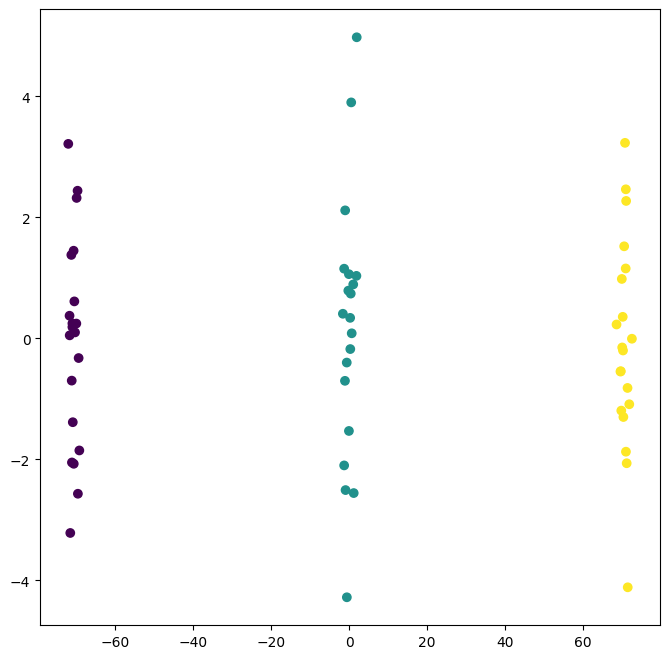

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(scores[:,0], scores[:,1], c = df_['Class'])

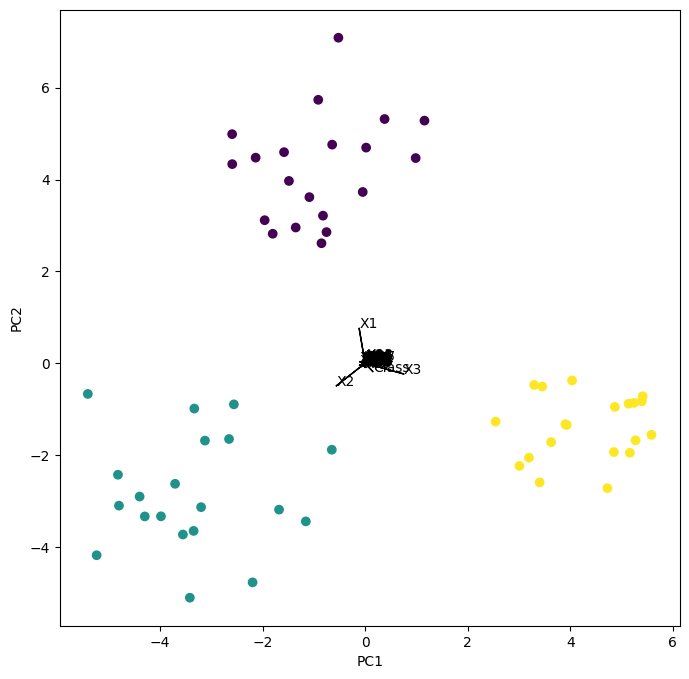

In [20]:
pcaD = PCA()
pcaD.fit(df)
scores_ = pcaD.transform(df)
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c = df['Class'])
ax.set_xlabel('PC%d' % (1))
ax.set_ylabel('PC%d' % (2))
for k in range(pcaD.components_.shape[1]):
  ax.arrow(0, 0, pcaD.components_[0,k], pcaD.components_[1,k])
  ax.text(pcaD.components_[0,k], pcaD.components_[1,k],df.columns[k])

In [21]:
# We can see three distinct groups and 3 vectors of X1, X2, and X3 point to each group.

### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

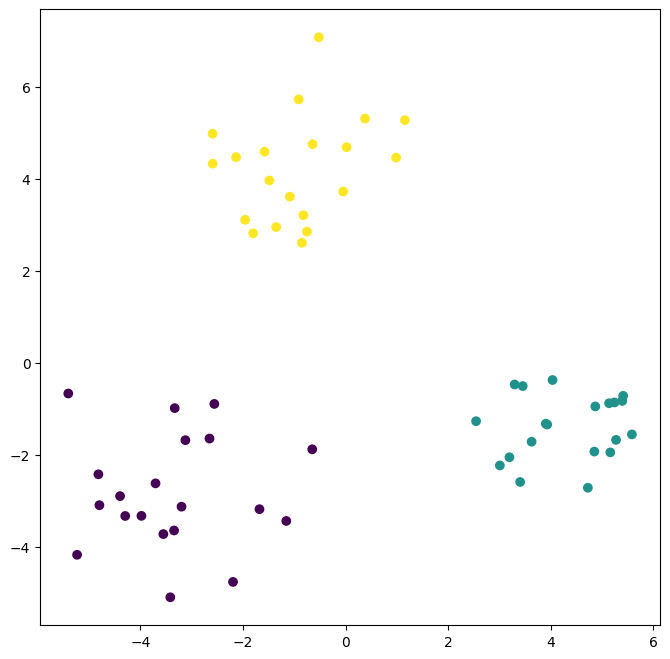

In [24]:
fig,ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c =kmeans.labels_)

In [26]:
# Looks like K means did a great job at labeling the points
# The colors are different since they give an arbitrary label to each class
# However we can easily see how it correctly picks the classes

### (d) Perform K-means clustering with K = 2. Describe your results.

In [27]:
kmeans_2 = KMeans(n_clusters = 2, random_state = 0)
kmeans_2.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

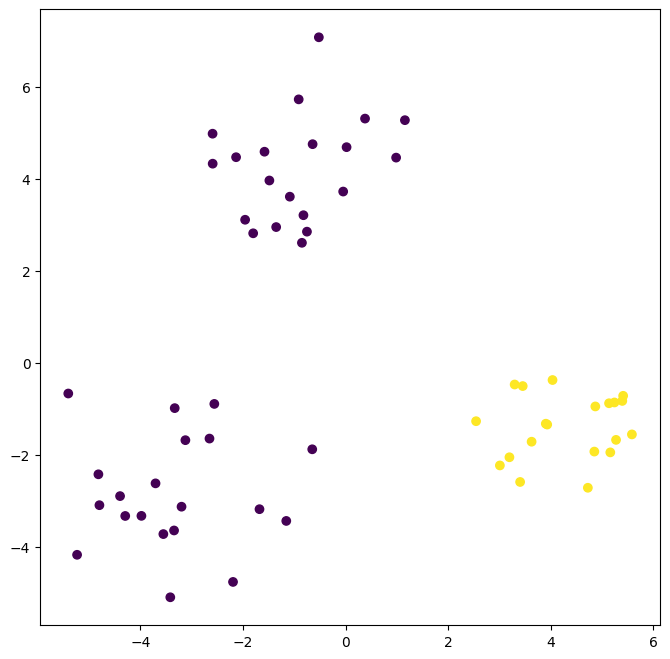

In [29]:
fig,ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c =kmeans_2.labels_)

In [30]:
# Definitely looks like there is 3 distinct groups which we know from the creation of the data
# The Kmeans has to label the third group into one of the two groups so it seems to pick the bottom left group
# I kinda expected it to break the group down the middle

### (e) Now perform K-means clustering with K = 4, and describe your results.

In [32]:
kmeans_4 = KMeans(n_clusters = 4, random_state = 0)
kmeans_4.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

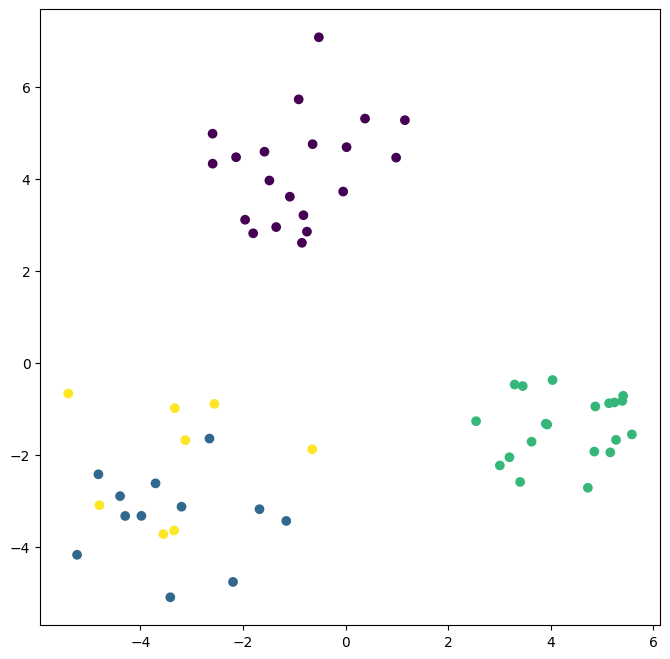

In [33]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c = kmeans_4.labels_)

In [35]:
# This time it does split a group up into 2 different colors
# The split isn't directly down the middle tho
# There is some yellows on the purple side
# Some purples on the yellow side

### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [36]:
kmeans_score = KMeans(n_clusters = 3, random_state = 0)
kmeans_score.fit(scores_[:,0:2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

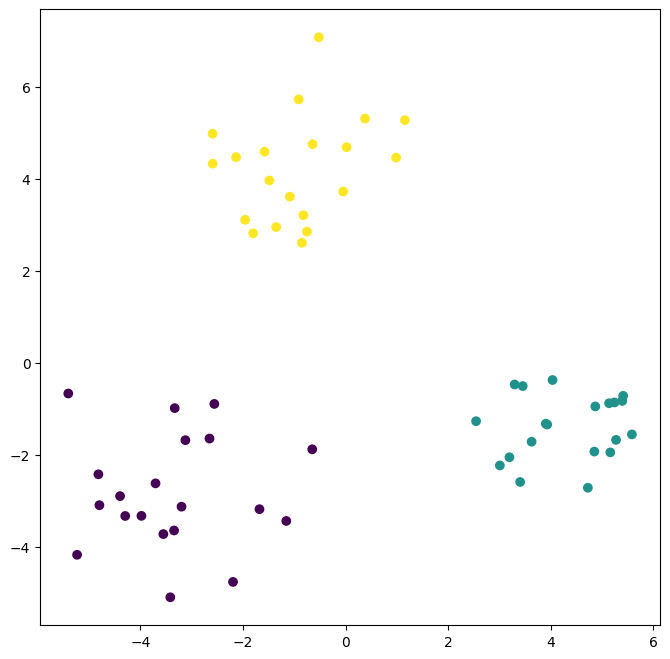

In [39]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c = kmeans_score.labels_)

In [40]:
# Results look identical to the results in (c)
# This makes sense since we fit it on the scores and the scores are easily broken up

### (g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [41]:
scaler = StandardScaler(with_mean = True, with_std = True)
df_scaled = scaler.fit_transform(df)

In [42]:
kmeans_scaled_3 = KMeans(n_clusters =3, random_state = 0)
kmeans_scaled_3.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

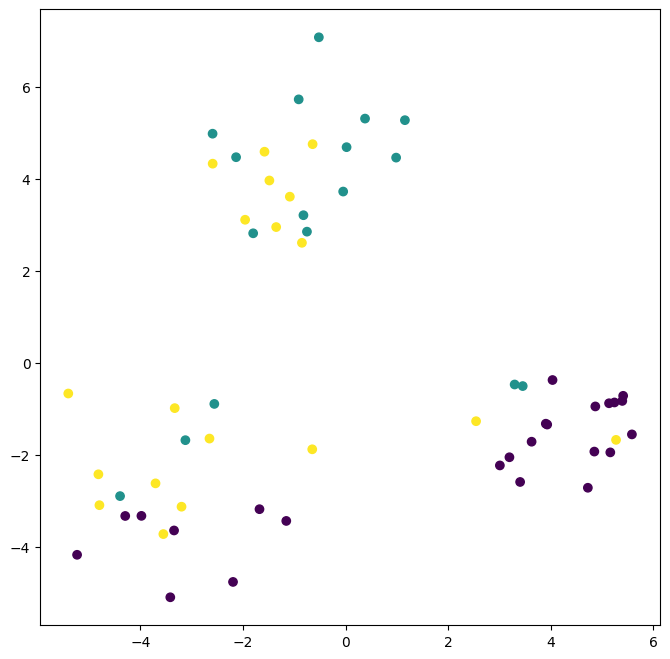

In [43]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(scores_[:,0], scores_[:,1], c = kmeans_scaled_3.labels_)

In [44]:
# These results do not agree with those obtained in (b) since the data was scaled.
# Once the data was scaled the K means algorithm found different groups
# This shows an importance to scaling your data but also a drawback to scaling it.

## Question 11. Write a Python function to perform matrix completion as in Algorithm 12.1, and as outlined in Section 12.5.2. In each iteration, the function should keep track of the relative error, as well as the iteration count. Iterations should continue until the relative error is small enough or until some maximum number of iterations is reached (set a default value for this maximum number). Furthermore, there should be an option to print out the progress in each iteration.

In [12]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [13]:
scaler = StandardScaler(with_mean = True, with_std = True)
df_us = scaler.fit_transform(USArrests)

In [22]:
X = df_us

In [16]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit,replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]),n_omit,replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan
r_idx, c_idx

(array([35, 37, 41, 26, 38, 43,  3, 33, 30, 36, 14, 16, 20,  9, 44, 47, 49,
        22, 25, 42]),
 array([3, 3, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 0, 0, 2, 2, 0, 1, 2]))

In [17]:
Xna

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,         nan],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [        nan,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 ,         nan],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101,    

In [33]:
def low_rank(X, M):
  U, D, V = np.linalg.svd(X)
  L = U[:,:min(M, X.shape[1])] * D[None,:min(M, X.shape[1])]
  return L.dot(V[:M])

In [23]:
#step 1 , fill missing values with average of the columns
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis = 0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [24]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
#is miss is a matrix of missing falses marked by false or true
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [25]:
while rel_err > thresh:
  count += 1
  # Step 2(a)
  Xapp = low_rank(Xhat, M=1)
  #find the principal components of the matrix
  # Step 2(b)
  Xhat[ismiss] = Xapp[ismiss]
  # set the missing values of the matrix equal to the principal components
  # Step 2(c)
  mss = np.mean(((Xna - Xapp)[~ismiss])**2)
  rel_err = (mssold - mss) / mss0
  mssold = mss
  # see if the principal components from our update matrix will give us closer guesses on the known components
  #calculate the relative error of the non missing measurements
  print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


### Test your function on the Boston data. First, standardize the features to have mean zero and standard deviation one using the StandardScaler() function. Run an experiment where you randomly leave out an increasing (and nested) number of observations from $5%$ to $30%$, in steps of $5%$. Apply Algorithm $12.1$ with $M = 1, 2,..., 8$. Display the approximation error as a function of the fraction of observations that are missing, and the value of $M$, averaged over $10$ repetitions of the experiment.

In [26]:
Bost = load_data('Boston')

In [27]:
bost_scaled = StandardScaler().fit_transform(Bost)

In [36]:
min_mss = float('inf')
best_m = None
best_n_omit = None
for n_omit in range(5,31,5):
  np.random.seed(1)
  r_idx = np.random.choice(np.arange(X.shape[0]), n_omit,replace=False)
  c_idx = np.random.choice(np.arange(X.shape[1]),n_omit,replace=True)
  Xna = X.copy()
  Xna[r_idx, c_idx] = np.nan
  for M in range(1,9):
    thresh = 1e-7
    rel_err = 1
    count = 0
    ismiss = np.isnan(Xna)
    #is miss is a matrix of missing falses marked by false or true
    mssold = np.mean(Xhat[~ismiss]**2)
    mss0 = np.mean(Xna[~ismiss]**2)
    #step 1 , fill missing values with average of the columns
    Xhat = Xna.copy()
    Xbar = np.nanmean(Xhat, axis = 0)
    Xhat[r_idx, c_idx] = Xbar[c_idx]
    while rel_err > thresh:
      count += 1
      # Step 2(a)
      Xapp = low_rank(Xhat, M)
      #find the principal components of the matrix
      # Step 2(b)
      Xhat[ismiss] = Xapp[ismiss]
      # set the missing values of the matrix equal to the principal components
      # Step 2(c)
      mss = np.mean(((Xna - Xapp)[~ismiss])**2)
      rel_err = (mssold - mss) / mss0
      mssold = mss
      if mss < min_mss:
        min_mss = mss
        best_m = M
        best_n_omit = n_omit
      # see if the principal components from our update matrix will give us closer guesses on the known components
      #calculate the relative error of the non missing measurements
      print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}, M value: {3}, Omitted values: {4}".format(count, mss, rel_err, M, n_omit))
print('Best MSS is: {0}, with the M value: {1}, with the Omit value: {2}'.format(min_mss,best_m,best_n_omit))


Iteration: 1, MSS:0.374, Rel.Err 4.80e-01, M value: 1, Omitted values: 5
Iteration: 2, MSS:0.371, Rel.Err 2.58e-03, M value: 1, Omitted values: 5
Iteration: 3, MSS:0.371, Rel.Err 2.82e-04, M value: 1, Omitted values: 5
Iteration: 4, MSS:0.371, Rel.Err 3.55e-05, M value: 1, Omitted values: 5
Iteration: 5, MSS:0.371, Rel.Err 4.83e-06, M value: 1, Omitted values: 5
Iteration: 6, MSS:0.371, Rel.Err 6.92e-07, M value: 1, Omitted values: 5
Iteration: 7, MSS:0.371, Rel.Err 1.03e-07, M value: 1, Omitted values: 5
Iteration: 8, MSS:0.371, Rel.Err 1.56e-08, M value: 1, Omitted values: 5
Iteration: 1, MSS:0.123, Rel.Err 8.73e-01, M value: 2, Omitted values: 5
Iteration: 2, MSS:0.119, Rel.Err 3.72e-03, M value: 2, Omitted values: 5
Iteration: 3, MSS:0.119, Rel.Err 5.82e-04, M value: 2, Omitted values: 5
Iteration: 4, MSS:0.119, Rel.Err 1.17e-04, M value: 2, Omitted values: 5
Iteration: 5, MSS:0.119, Rel.Err 3.44e-05, M value: 2, Omitted values: 5
Iteration: 6, MSS:0.119, Rel.Err 1.60e-05, M value:

In [37]:
# We see the best approximation using principal components with 4 principal components
# 25 values ommited
# I am unsure what the book wants us to output so I output a bunch of different data

## Question 12. In Section 12.5.2, Algorithm 12.1 was implemented using the svd() function from the np.linalg module. However, given the connection between the svd() function and the PCA() estimator highlighted in the lab, we could have instead implemented the algorithm using PCA(). Write a function to implement Algorithm 12.1 that makes use of PCA() rather than svd().

In [38]:
# Old low rank function modified for question 11
def low_rank(X, M):
  U, D, V = np.linalg.svd(X)
  L = U[:,:min(M, X.shape[1])] * D[None,:min(M, X.shape[1])]
  return L.dot(V[:M])


In [45]:
# New low rank function modified for question 12
def low_rank_pca(X, M):
  pca = PCA(n_components = min(M, X.shape[1]))
  pca.fit(X)
  V = pca.components_
  # THe L is the scores value and works the same
  L = pca.transform(X)
  # The components are the U * D value
  return L.dot(V[:M])

In [46]:
min_mss = float('inf')
best_m = None
best_n_omit = None
for n_omit in range(5,31,5):
  np.random.seed(1)
  r_idx = np.random.choice(np.arange(X.shape[0]), n_omit,replace=False)
  c_idx = np.random.choice(np.arange(X.shape[1]),n_omit,replace=True)
  Xna = X.copy()
  Xna[r_idx, c_idx] = np.nan
  for M in range(1,9):
    thresh = 1e-7
    rel_err = 1
    count = 0
    ismiss = np.isnan(Xna)
    #is miss is a matrix of missing falses marked by false or true
    mssold = np.mean(Xhat[~ismiss]**2)
    mss0 = np.mean(Xna[~ismiss]**2)
    #step 1 , fill missing values with average of the columns
    Xhat = Xna.copy()
    Xbar = np.nanmean(Xhat, axis = 0)
    Xhat[r_idx, c_idx] = Xbar[c_idx]
    while rel_err > thresh:
      count += 1
      # Step 2(a)
      Xapp = low_rank_pca(Xhat, M)
      #find the principal components of the matrix
      # Step 2(b)
      Xhat[ismiss] = Xapp[ismiss]
      # set the missing values of the matrix equal to the principal components
      # Step 2(c)
      mss = np.mean(((Xna - Xapp)[~ismiss])**2)
      rel_err = (mssold - mss) / mss0
      mssold = mss
      if mss < min_mss:
        min_mss = mss
        best_m = M
        best_n_omit = n_omit
      # see if the principal components from our update matrix will give us closer guesses on the known components
      #calculate the relative error of the non missing measurements
      print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}, M value: {3}, Omitted values: {4}".format(count, mss, rel_err, M, n_omit))
print('Best MSS is: {0}, with the M value: {1}, with the Omit value: {2}'.format(min_mss,best_m,best_n_omit))

Iteration: 1, MSS:0.374, Rel.Err 4.80e-01, M value: 1, Omitted values: 5
Iteration: 2, MSS:0.372, Rel.Err 2.61e-03, M value: 1, Omitted values: 5
Iteration: 3, MSS:0.371, Rel.Err 2.83e-04, M value: 1, Omitted values: 5
Iteration: 4, MSS:0.371, Rel.Err 3.53e-05, M value: 1, Omitted values: 5
Iteration: 5, MSS:0.371, Rel.Err 4.77e-06, M value: 1, Omitted values: 5
Iteration: 6, MSS:0.371, Rel.Err 6.80e-07, M value: 1, Omitted values: 5
Iteration: 7, MSS:0.371, Rel.Err 1.01e-07, M value: 1, Omitted values: 5
Iteration: 8, MSS:0.371, Rel.Err 1.52e-08, M value: 1, Omitted values: 5
Iteration: 1, MSS:0.123, Rel.Err 8.72e-01, M value: 2, Omitted values: 5
Iteration: 2, MSS:0.120, Rel.Err 3.70e-03, M value: 2, Omitted values: 5
Iteration: 3, MSS:0.119, Rel.Err 5.80e-04, M value: 2, Omitted values: 5
Iteration: 4, MSS:0.119, Rel.Err 1.22e-04, M value: 2, Omitted values: 5
Iteration: 5, MSS:0.119, Rel.Err 3.99e-05, M value: 2, Omitted values: 5
Iteration: 6, MSS:0.119, Rel.Err 2.00e-05, M value:

In [47]:
# We can see we still generate the M value of 4 as the best value
# The omit is slight different
# The previous best MSS was 1.5e-31, and this one is 3.7 e-07.
# We can see it works just as well, however the values can slightly differ since there is randomness to what is left out

## Question 13. On the book website, www.statlearning.com, there is a gene expression data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The frst 20 samples are from healthy patients, while the second 20 are from a diseased group.